In [62]:
import xgboost as xgb
import pandas as pd 
from sklearn.model_selection import  train_test_split, RandomizedSearchCV
from sklearn.metrics import auc, precision_recall_curve , classification_report
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt 
from sklearn.metrics import make_scorer, precision_recall_curve, auc
from sklearn.metrics import average_precision_score
from scipy.stats import uniform, randint

In [52]:
credit_card = pd.read_csv('dataset/creditcard.csv')
credit_card.drop(['V15'], axis = 1,inplace=True) # similar distribution for both type fraud and valid 

In [53]:
X = credit_card.drop("Class", axis = 1) # Features 
y = credit_card['Class']  # target variable 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [55]:
smote = SMOTE(sampling_strategy={1:5000}, random_state=42)

In [56]:
X_sampled , y_sampled = smote.fit_resample(X_train, y_train )

In [57]:
best_params = {'min_child_weight': 0.4,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [58]:
model_best = xgb.XGBClassifier(**best_params)

In [59]:
model_best.fit(X_sampled, y_sampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=0.4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
y_pred = model_best.predict(X_test)
result = classification_report(y_test, y_pred)


In [64]:
print(result) # not the best metrics for the unbalanced data sets 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.81      0.85      0.83       191

    accuracy                           1.00    113923
   macro avg       0.90      0.93      0.91    113923
weighted avg       1.00      1.00      1.00    113923



In [60]:
y_pred_proba = model_best.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)

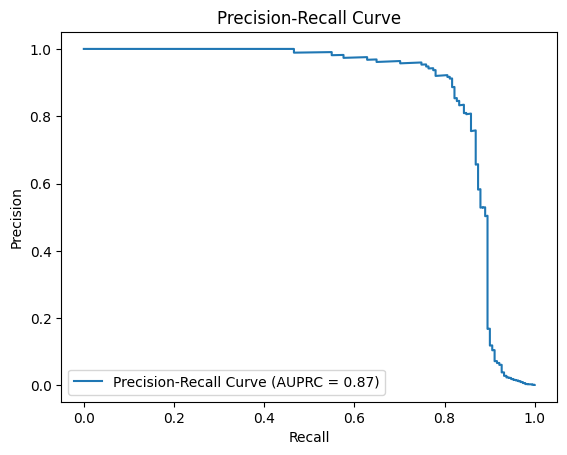

In [61]:
# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve (AUPRC = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()